## Data and Preproccessing

Read the data from pdf file

In [1]:
#Read the pdf with PyPDF2

#!pip install PyPDF2
import PyPDF2

with open('cocacola_10k.pdf', 'rb') as file:
    reader = PyPDF2.PdfReader(file)
    num_pages = len(reader.pages)
    print(num_pages)
    page = reader.pages[0]
    text = page.extract_text()
    print(text)

183
UNITED ST ATES
SECURITIES AND EXCHANGE COMMISSION
WASHINGTON, D.C. 20549
FORM 10-K
(Mark One)
☒ ANNUAL  REPOR T PURSUANT  TO SECTION 13 OR 15(d) OF  THE SECURITIES EXCHANGE ACT  OF 1934
For the fiscal year  ended December  31, 2022
OR
☐ TRANSITION REPOR T PURSUANT  TO SECTION 13 OR 15(d) OF  THE SECURITIES EXCHANGE ACT  OF 1934
For the transition period fr om to
Commission File Number  001-02217
COCA COLA CO
(Exact name of Registrant as specified in its charter)
Delaware 58-0628465
(State or other jurisdiction of incorporation) (I.R.S. Employer Identification No.)
One Coca-Cola Plaza
Atlanta,Georgia 30313
(Address of principal executive offices) (Zip Code)
Registrant’s telephone number, including area code: (404) 676-2121
Securities registered pursuant to Section 12(b) of the Act:
Title of each class Trading Symbol(s) Name of each exchange on which registered
Common Stock, $0.25 Par Value KO New York Stock Exchange
0.500% Notes Due 2024 KO24 New York Stock Exchange
1.875% Notes Due

Extract the Management’s Discussion and Analysis of Financial Condition and Results of Operations session from the PDF file

In [2]:
#Extract MDA Section

import re

mda_start = re.compile(r"Management’s Discussion and Analysis of Financial Condition and Results of Operations")
mda_end = re.compile(r"Quantitative and Qualitative Disclosures About Market Risk")

mda_section = ""
for line in text.split('\n'):
    if mda_start.search(line):
        mda_section += line + '\n'
    elif mda_end.search(line):
        break
    else:
        mda_section += line + '\n'

In [3]:
print(mda_section)

UNITED ST ATES
SECURITIES AND EXCHANGE COMMISSION
WASHINGTON, D.C. 20549
FORM 10-K
(Mark One)
☒ ANNUAL  REPOR T PURSUANT  TO SECTION 13 OR 15(d) OF  THE SECURITIES EXCHANGE ACT  OF 1934
For the fiscal year  ended December  31, 2022
OR
☐ TRANSITION REPOR T PURSUANT  TO SECTION 13 OR 15(d) OF  THE SECURITIES EXCHANGE ACT  OF 1934
For the transition period fr om to
Commission File Number  001-02217
COCA COLA CO
(Exact name of Registrant as specified in its charter)
Delaware 58-0628465
(State or other jurisdiction of incorporation) (I.R.S. Employer Identification No.)
One Coca-Cola Plaza
Atlanta,Georgia 30313
(Address of principal executive offices) (Zip Code)
Registrant’s telephone number, including area code: (404) 676-2121
Securities registered pursuant to Section 12(b) of the Act:
Title of each class Trading Symbol(s) Name of each exchange on which registered
Common Stock, $0.25 Par Value KO New York Stock Exchange
0.500% Notes Due 2024 KO24 New York Stock Exchange
1.875% Notes Due 202

Preprocess the extracted text by lowerring the case, removing punctuations, stop words and carring out stemming and lemmatization to normalize the text

In [3]:
#preprocess text 
#convert to lowercase, reove punctuation, remove stopwords
#stemming and lemmatization

from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

#lowercase
mda_section = mda_section.lower() 

# remove punctuation
mda_section = mda_section.translate(str.maketrans("", "", string.punctuation)) 

#tokenize and remove stopwords
stop_words = set (stopwords.words('english'))
tokens = word_tokenize(mda_section)
filtered_tokens = [token for token  in tokens if token not in stop_words]

#stemming and lemmatization
ps = PorterStemmer()
lemmatized_tokens = [ps.stem(token) for token in filtered_tokens]


In [4]:
#view the lemmatized tokens
lemmatized_tokens

['unit',
 'st',
 'ate',
 'secur',
 'exchang',
 'commiss',
 'washington',
 'dc',
 '20549',
 'form',
 '10k',
 'mark',
 'one',
 '☒',
 'annual',
 'repor',
 'pursuant',
 'section',
 '13',
 '15d',
 'secur',
 'exchang',
 'act',
 '1934',
 'fiscal',
 'year',
 'end',
 'decemb',
 '31',
 '2022',
 '☐',
 'transit',
 'repor',
 'pursuant',
 'section',
 '13',
 '15d',
 'secur',
 'exchang',
 'act',
 '1934',
 'transit',
 'period',
 'fr',
 'om',
 'commiss',
 'file',
 'number',
 '00102217',
 'coca',
 'cola',
 'co',
 'exact',
 'name',
 'registr',
 'specifi',
 'charter',
 'delawar',
 '580628465',
 'state',
 'jurisdict',
 'incorpor',
 'ir',
 'employ',
 'identif',
 'one',
 'cocacola',
 'plaza',
 'atlantageorgia',
 '30313',
 'address',
 'princip',
 'execut',
 'offic',
 'zip',
 'code',
 'registr',
 '’',
 'telephon',
 'number',
 'includ',
 'area',
 'code',
 '404',
 '6762121',
 'secur',
 'regist',
 'pursuant',
 'section',
 '12b',
 'act',
 'titl',
 'class',
 'trade',
 'symbol',
 'name',
 'exchang',
 'regist',
 'comm

## Sentiment Analysis

In [5]:
#Sentiment Analysis

#using textblob
#!pip install textblob
from textblob import TextBlob


text = ''.join(lemmatized_tokens)
mda_bolb = TextBlob(text)
sentiment = mda_bolb.sentiment.polarity
print("Sentiment: ", sentiment)

Sentiment:  0.0


In [6]:
#using nlkt for the sentiment analysis

from nltk.sentiment.vader import SentimentIntensityAnalyzer

sia=SentimentIntensityAnalyzer()

text = ''.join(lemmatized_tokens)
sentiment = sia.polarity_scores(text)
print("Sentiment: ", sentiment['compound'])


Sentiment:  0.0


The sentiment analysis is 0 which means the text is neutral

## Historical Stock Price Analysis



In [7]:
# getting historical data of stock price from yfinance

#!pip install yfinance
import yfinance as yf

data = yf.download(tickers="KO", start="2019-01-01", end="2023-12-31")

#print closing price of data
print(data['Close'])

[*********************100%%**********************]  1 of 1 completed
Date
2019-01-02    46.930000
2019-01-03    46.639999
2019-01-04    47.570000
2019-01-07    46.950001
2019-01-08    47.480000
                ...    
2023-12-22    58.320000
2023-12-26    58.560001
2023-12-27    58.709999
2023-12-28    58.750000
2023-12-29    58.930000
Name: Close, Length: 1258, dtype: float64


In [8]:
#calculating moving average price of closing price of stock to see trend of stock

data['7-Day MA'] = data['Close'].rolling(window=7).mean()
print(data['7-Day MA'])

Date
2019-01-02          NaN
2019-01-03          NaN
2019-01-04          NaN
2019-01-07          NaN
2019-01-08          NaN
                ...    
2023-12-22    58.487143
2023-12-26    58.418572
2023-12-27    58.434286
2023-12-28    58.395715
2023-12-29    58.410000
Name: 7-Day MA, Length: 1258, dtype: float64


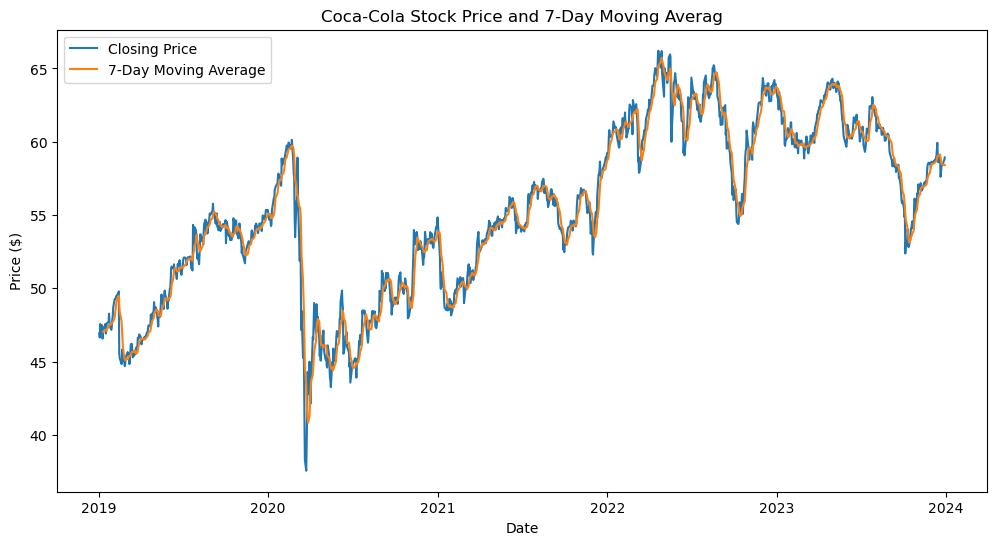

In [9]:
#Plot the closing prices and moving average prices of stock to visualize trend of stock

import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(data['Close'], label = "Closing Price")
plt.plot(data['7-Day MA'], label= "7-Day Moving Average")
plt.title("Coca-Cola Stock Price and 7-Day Moving Averag")
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.legend()
plt.show()


Generally, the stock has an upward trend

## Feature Extraction 

In [10]:
#Using TermFrequecy-Inverse Document Frequency (TF-IDF) to get features by converting the text into numerical features


from sklearn.feature_extraction.text import TfidfVectorizer


#Initiling the vectorizer
vectorizer = TfidfVectorizer()

#fit vectorizer and transform the data
X = vectorizer.fit_transform([''.join(lemmatized_tokens)])

#print shape to see dimentioned of transformed data
print(X.shape)




(1, 4)


## Machine Learning 

In [11]:
# using the exracted features as X and sentiment as y
#the document is duplicated to create a binary classification problem

import numpy as np

X = vectorizer.fit_transform([' '.join(lemmatized_tokens), ' '.join(lemmatized_tokens)])

# convert the sparse matric to a dense array
X = X.toarray()

#recall sentiment
sentiment = mda_bolb.sentiment.polarity

y = np.array([sentiment, -sentiment]) #first document is positive and second document is negative

#split into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.5, random_state=42)


In [12]:
# for Naive Bayes

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gnb_model = GaussianNB()
gnb_model.fit(X_train, y_train)

y_pred = gnb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Naives Bayes Accuracy: ", accuracy)

Naives Bayes Accuracy:  1.0


C:\Users\USER\anaconda3\lib\site-packages\sklearn\naive_bayes.py:489: RuntimeWarning: divide by zero encountered in log
  n_ij = -0.5 * np.sum(np.log(2.0 * np.pi * self.var_[i, :]))
C:\Users\USER\anaconda3\lib\site-packages\sklearn\naive_bayes.py:490: RuntimeWarning: invalid value encountered in true_divide
  n_ij -= 0.5 * np.sum(((X - self.theta_[i, :]) ** 2) / (self.var_[i, :]), 1)


In [13]:
# for Support Vector Machine

from sklearn.svm import SVC

svc_model = SVC(kernel="Linear", random_state=0)
svc_model.fit(X_train, y_train)

y_pred = svc_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("SVM Accuracy: ", accuracy)

ValueError: The number of classes has to be greater than one; got 1 class

In [14]:
print(np.unique(X_train))

[0.02297182 0.04594364 0.06891546 0.09188728 0.1148591  0.34457729
 0.36754911 0.39052093 0.45943639]


In [15]:
print(y_train)

[0.]


Since the y_class only has one unique value which is 0 due to the sentiment being neutral, the SVM would not work as it requires more than one class

In [16]:
# for Decision Tree

from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=0)
dt_model.fit(X_train, y_train)

y_predict = dt_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Decision Tree Accuracy: ", accuracy)

Decision Tree Accuracy:  1.0


Both Decision Tree and Naive Bayes gives an accuracy of 1

## Performance of diversified Stocks

The Performance metrics : Mean Absolute Percentage Error (MAPE) and Mean Absolute Error (MAE) are used to evaluate performance of diversified stocks.



In [17]:
# Calculate 7-day moving average 

data['7-Day MA'] = data['Close'].rolling(window=7).mean()


# MAPE

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred)/y_true))*100

mapes = []
for i in range(len(data)):
    mapes.append(mean_absolute_percentage_error(data["Close"][:i+1], data['7-Day MA'][:i+1]))

# MAE
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(data["Close"], data['7-Day MA'])

print("Mean Absolute Percentage Error (MAPE): ", sum(mapes)/len(mapes))
print("Mean Absolute Error: ", mae)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

To avoid/ deal with the error, the presence of NaN values is checked and replaced with mean of data. 

In [18]:
data['7-Day MA'] = data['Close'].rolling(window=7).mean()

#check for NaN values in the moverng average data
print(data['7-Day MA'].isnull().sum())


6


In [19]:
#replace NaN values with mean
data['7-Day MA'] = data['7-Day MA'].fillna(data['7-Day MA'].mean())

In [20]:
#check for NaN values in the closing price data
print(data['Close'].isnull().sum())

0


The presence of infinity values is also checked

In [21]:
#check for and handle infinity values in the moverng average data
print(np.isinf(data['7-Day MA']).sum())

0


In [22]:
#check for and handle infinity values in the closing price data
print(np.isinf(data['Close']).sum())

0


The MAPE and MAE is then calculated

In [23]:
# MAPE

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred)/y_true))*100

mapes = []
for i in range(len(data)):
    mapes.append(mean_absolute_percentage_error(data["Close"][:i+1], data['7-Day MA'][:i+1]))

# MAE
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(data["Close"], data['7-Day MA'])

print("Mean Absolute Percentage Error (MAPE): ", sum(mapes)/len(mapes))
print("Mean Absolute Error: ", mae)

Mean Absolute Percentage Error (MAPE):  1.7459576571339992
Mean Absolute Error:  0.6794928356827612


The small MAPE indicates a small persentage error in prediction likewise the low MAE indicates  a small absolute error in the predictions.

These metrics suggest that the diversified stocks strategy (since the moving average is used as a proxy for the predicted stock prices) perform well. The relatively small MAPE and MAE indicate that the predictions were close to actual stock prices.